### Prepare Programming Environment

In [68]:
# Import libraries
import pandas as pd # Dataframe
import numpy as np # Math
import seaborn as sns # Graphs
import matplotlib.pyplot as plt # Graphs
import random # Randomness
import numpy as np # Math
from sklearn import svm # Support Vector Machines
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, validation_curve # Model tunning
from sklearn.preprocessing import StandardScaler # Preprocessing
from sklearn.metrics import accuracy_score, classification_report # Model Evaluation

sd = 666

random.seed(sd)
np.random.seed(sd)

In [69]:
# Load dataset: Iris
columns = ["sepal length","sepal width","petal length","petal width", "class"]
df = pd.read_csv('iris.data', names = columns)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Exploration

In [70]:
# Explore dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


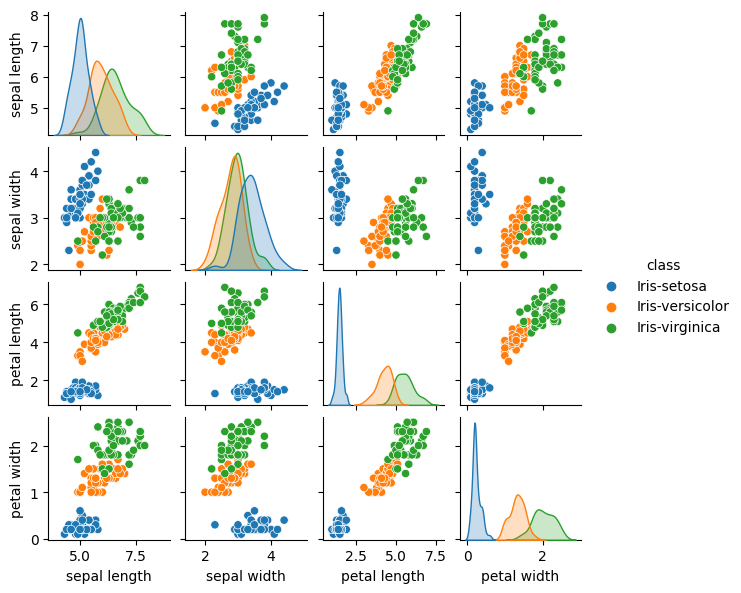

In [72]:
# Check for linear separability
sns.pairplot(df, hue='class', size=1.5);

In [73]:
# Check for linear separability (validation)
'''
A linear svm model is trained with semi hard marigin on all the data and predictions 
are made on the same data used to train it. If the accuracy is 100% then the 
data was properly separated otherwise the data is not linearly separable
'''
XLin = df[["sepal length", "sepal width", "petal length", "petal width"]]
yLin = df["class"]
linModel = svm.SVC(C=1e10, kernel='linear')
linModel.fit(XLin, yLin)
y_pred_lin = linModel.predict(XLin)
accuracy_lin = accuracy_score(yLin, y_pred_lin)
print(accuracy_lin * 100)

98.0


In [74]:
# Check target balance
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

**Important Remarks:**
- The data has no null values
- The classes are balanced
- The data is not linearly separable

### Data Preproccesing

In [75]:
# Split the dataset into features and targets
y = np.array(df["class"].copy().to_numpy())
X = np.array(df.drop("class", axis = 1).copy())

# Standarize the feature dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the datasets into training and testing | 70% - 30%
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = sd, shuffle = True, stratify = y)

### Modeling

In [76]:
# Define cross validation grid
cv_grid = {"C": [0.1, 1, 10, 100], "kernel": ["linear", "poly", "rbf", "sigmoid"]}

# Define the cross validation strategy | 5-Folds 
cv = KFold(n_splits = 5, shuffle = True, random_state = sd)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = sd)

In [77]:
# Initialize the SVM model
model = svm.SVC(random_state = sd)

In [78]:
# Perform cross validation grid search 
best_model = GridSearchCV(estimator = model, param_grid = cv_grid, cv = cv, scoring = "accuracy", refit = True)
best_model.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=666, shuffle=True),
             estimator=SVC(random_state=666),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [79]:
best_model.cv_results_

{'mean_fit_time': array([0.0019969 , 0.00200233, 0.00240116, 0.00239573, 0.0022028 ,
        0.00179758, 0.00200233, 0.0013979 , 0.00099921, 0.00099058,
        0.00099545, 0.00079985, 0.00119381, 0.00160408, 0.00140328,
        0.00099983]),
 'std_fit_time': array([6.31520810e-04, 6.35481806e-04, 4.89081006e-04, 1.01527709e-03,
        3.99538392e-04, 7.47028904e-04, 9.02450668e-04, 4.91128972e-04,
        2.39986983e-05, 1.13025495e-05, 5.82132052e-06, 3.99926125e-04,
        4.05863061e-04, 4.98491504e-04, 8.06707157e-04, 8.99694551e-07]),
 'mean_score_time': array([0.00119686, 0.00120306, 0.0013988 , 0.00159912, 0.00180001,
        0.0010005 , 0.00059533, 0.00079846, 0.00099387, 0.00101018,
        0.00080614, 0.00060062, 0.00060382, 0.00099449, 0.00059314,
        0.0006    ]),
 'std_score_time': array([3.96612528e-04, 3.99010200e-04, 4.91984765e-04, 4.89051089e-04,
        4.02611925e-04, 6.33617774e-04, 4.86165217e-04, 3.99235965e-04,
        1.56411310e-05, 9.08496803e-06, 4.03

In [80]:
# Select the best model
best_model.best_params_

{'C': 10, 'kernel': 'linear'}

### Evaluation

In [81]:
# Evaluate the model | Accuracy | Nested Cross validation
nested_score = cross_val_score(best_model, X = X, y = y, cv = outer_cv, scoring = "accuracy")
accuracy = nested_score.mean()

print(nested_score)
print(accuracy)

[1.         1.         0.93333333 0.9        0.93333333]
0.9533333333333334


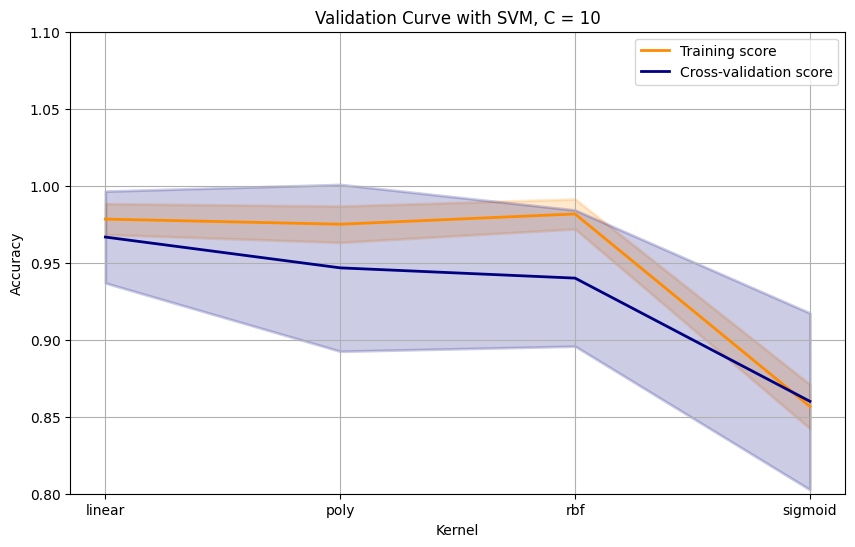

In [82]:
# Validation Curve on kernel parameter
train_scores, test_scores = validation_curve(
    svm.SVC(C = 10, random_state=sd),
    X, y,
    param_name = "kernel",
    param_range=cv_grid["kernel"],
    cv = cv,
    scoring="accuracy"
)

# Calculate mean and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVM, C = 10")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.1)

plt.plot(cv_grid["kernel"], train_scores_mean, label = "Training score", color = "darkorange", lw = 2)
plt.fill_between(cv_grid["kernel"], train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.2, color = "darkorange", lw = 2)

plt.plot(cv_grid["kernel"], test_scores_mean, label = "Cross-validation score", color = "navy", lw = 2)
plt.fill_between(cv_grid["kernel"], test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.2, color = "navy", lw = 2)

plt.legend(loc = "best")
plt.grid(True)
plt.show()

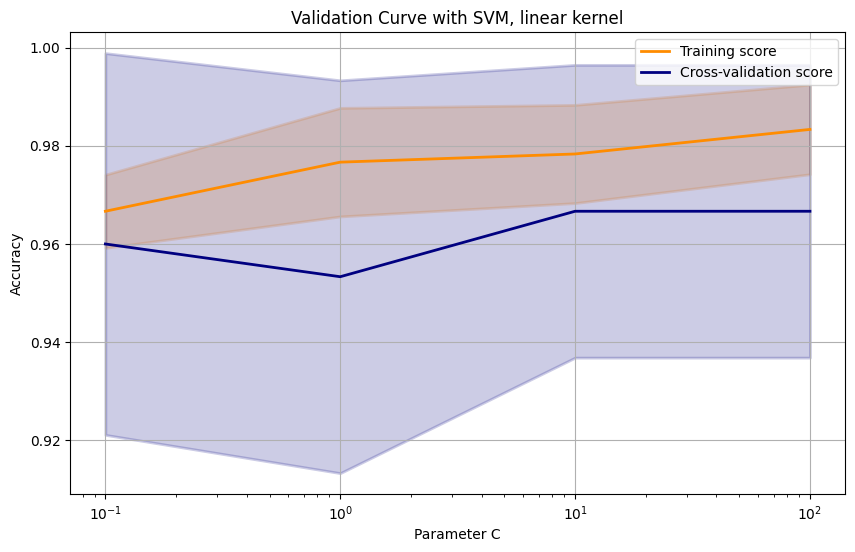

In [83]:
# Validation Curve on C parameter
train_scores, test_scores = validation_curve(
    svm.SVC(kernel='linear', random_state=sd),
    X, y,
    param_name = "C",
    param_range = cv_grid["C"],
    cv = cv,
    scoring="accuracy"
)

# Calculate mean and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize = (10, 6))
plt.title("Validation Curve with SVM, linear kernel")
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
#plt.ylim(0.9, 1.02)

plt.semilogx(cv_grid["C"], train_scores_mean, label = "Training score", color = "darkorange", lw = 2)
plt.fill_between(cv_grid["C"], train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.2, color = "darkorange", lw = 2)

plt.semilogx(cv_grid["C"], test_scores_mean, label = "Cross-validation score", color = "navy", lw = 2)
plt.fill_between(cv_grid["C"], test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.2, color = "navy", lw = 2)

plt.legend(loc = "best")
plt.grid(True)
plt.show()

Mean Training Score: 0.9817
Training Score Standard Deviation: 0.0062
Mean Cross-Validation Score: 0.9533
Cross-Validation Score Standard Deviation: 0.0400


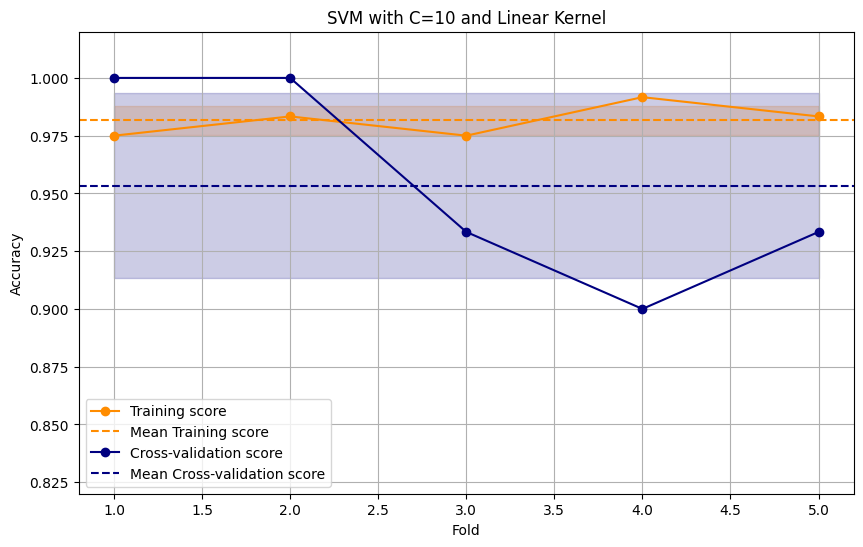

In [84]:
# Validation Curve on Folds
train_scores = []
test_scores = []

for train_index, test_index in outer_cv.split(X):
    X_cv, X_test_cv = X[train_index], X[test_index]
    y_cv, y_test_cv = y[train_index], y[test_index]
    
    best_model.fit(X_cv, y_cv)
    train_scores.append(best_model.score(X_cv, y_cv))
    test_scores.append(best_model.score(X_test_cv, y_test_cv))

# Calculate mean and standard deviations
train_scores_mean = np.mean(train_scores)
train_scores_std = np.std(train_scores)
test_scores_mean = np.mean(test_scores)
test_scores_std = np.std(test_scores)

# Display the values
print(f"Mean Training Score: {train_scores_mean:.4f}")
print(f"Training Score Standard Deviation: {train_scores_std:.4f}")
print(f"Mean Cross-Validation Score: {test_scores_mean:.4f}")
print(f"Cross-Validation Score Standard Deviation: {test_scores_std:.4f}")

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("SVM with C=10 and Linear Kernel")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.82, 1.02)

plt.plot(range(1, len(train_scores) + 1), train_scores, 'o-', label='Training score', color='darkorange')
plt.fill_between(range(1, len(train_scores) + 1), train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='darkorange')
plt.axhline(y=train_scores_mean, color='darkorange', linestyle='--', label='Mean Training score')

plt.plot(range(1, len(test_scores) + 1), test_scores, 'o-', label='Cross-validation score', color='navy')
plt.fill_between(range(1, len(test_scores) + 1), test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='navy')
plt.axhline(y=test_scores_mean, color='navy', linestyle='--', label='Mean Cross-validation score')

plt.legend(loc="best")
plt.grid(True)
plt.show()